<a href="https://colab.research.google.com/github/A-ryan-ngl/model-cool/blob/main/PricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
import xgboost as xgb
from xgboost import XGBRegressor

### **Data Acquisation**

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
df=pd.read_csv('/content/drive/MyDrive/Project/dehradun_house_price2.csv')

In [105]:
df.head()

,price,area,bedroom,bathroom,stories,mainroad,guestroom,basement,facing,parking,prefarea,furnishingstatus
0,9495299,427,4,4,3,not connected,yes,yes,west,no,2,not furnished
1,4657356,146,2,1,1,not connected,no,yes,north,no,2,semi-furnished
2,18285022,385,5,3,4,connected,no,yes,north,no,1,furnished
3,3633033,136,2,1,1,not connected,no,no,west,no,3,semi-furnished
4,11320566,343,5,3,3,not connected,no,yes,south,no,2,semi-furnished


In [106]:
df.tail()

,price,area,bedroom,bathroom,stories,mainroad,guestroom,basement,facing,parking,prefarea,furnishingstatus
1138,3485612,225,4,3,2,connected,no,yes,south,yes,4,semi-furnished
1139,19665687,349,5,2,4,connected,yes,yes,south,yes,1,furnished
1140,3652593,131,2,1,1,not connected,yes,no,east,no,3,semi-furnished
1141,5086089,136,3,1,2,connected,yes,yes,north,no,3,semi-furnished
1142,8978219,274,3,3,2,connected,no,no,north,yes,1,not furnished


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             1143 non-null   int64 
 1   area              1143 non-null   int64 
 2   bedroom           1143 non-null   int64 
 3   bathroom          1143 non-null   int64 
 4   stories           1143 non-null   int64 
 5   mainroad          1143 non-null   object
 6   guestroom         1143 non-null   object
 7   basement          1143 non-null   object
 8   facing            1143 non-null   object
 9   parking           1143 non-null   object
 10  prefarea          1143 non-null   int64 
 11  furnishingstatus  1143 non-null   object
dtypes: int64(6), object(6)
memory usage: 107.3+ KB


In [108]:
print(df.describe())

              price         area      bedroom     bathroom      stories  \
count  1.143000e+03  1143.000000  1143.000000  1143.000000  1143.000000   
mean   8.216408e+06   286.017498     3.566054     2.259843     2.271216   
std    4.398425e+06   121.707538     1.200103     0.960620     0.781755   
min    2.500000e+06    80.000000     1.000000     1.000000     1.000000   
25%    4.275094e+06   180.000000     3.000000     2.000000     2.000000   
50%    7.262545e+06   281.000000     4.000000     2.000000     2.000000   
75%    1.162447e+07   390.000000     5.000000     3.000000     3.000000   
max    2.307180e+07   499.000000     5.000000     4.000000     4.000000   

          prefarea  
count  1143.000000  
mean      2.499563  
std       1.118915  
min       1.000000  
25%       1.500000  
50%       2.000000  
75%       3.500000  
max       4.000000  


### **Filtering Dataset**

In [109]:
df.isnull()

,price,area,bedroom,bathroom,stories,mainroad,guestroom,basement,facing,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,False,False,False,False,False,False,False,False,False,False,False,False
1139,False,False,False,False,False,False,False,False,False,False,False,False
1140,False,False,False,False,False,False,False,False,False,False,False,False
1141,False,False,False,False,False,False,False,False,False,False,False,False


In [110]:
df.isnull().sum()

,0
price,0
area,0
bedroom,0
bathroom,0
stories,0
mainroad,0
guestroom,0
basement,0
facing,0
parking,0


### **Graphing and Plotting**

In [111]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

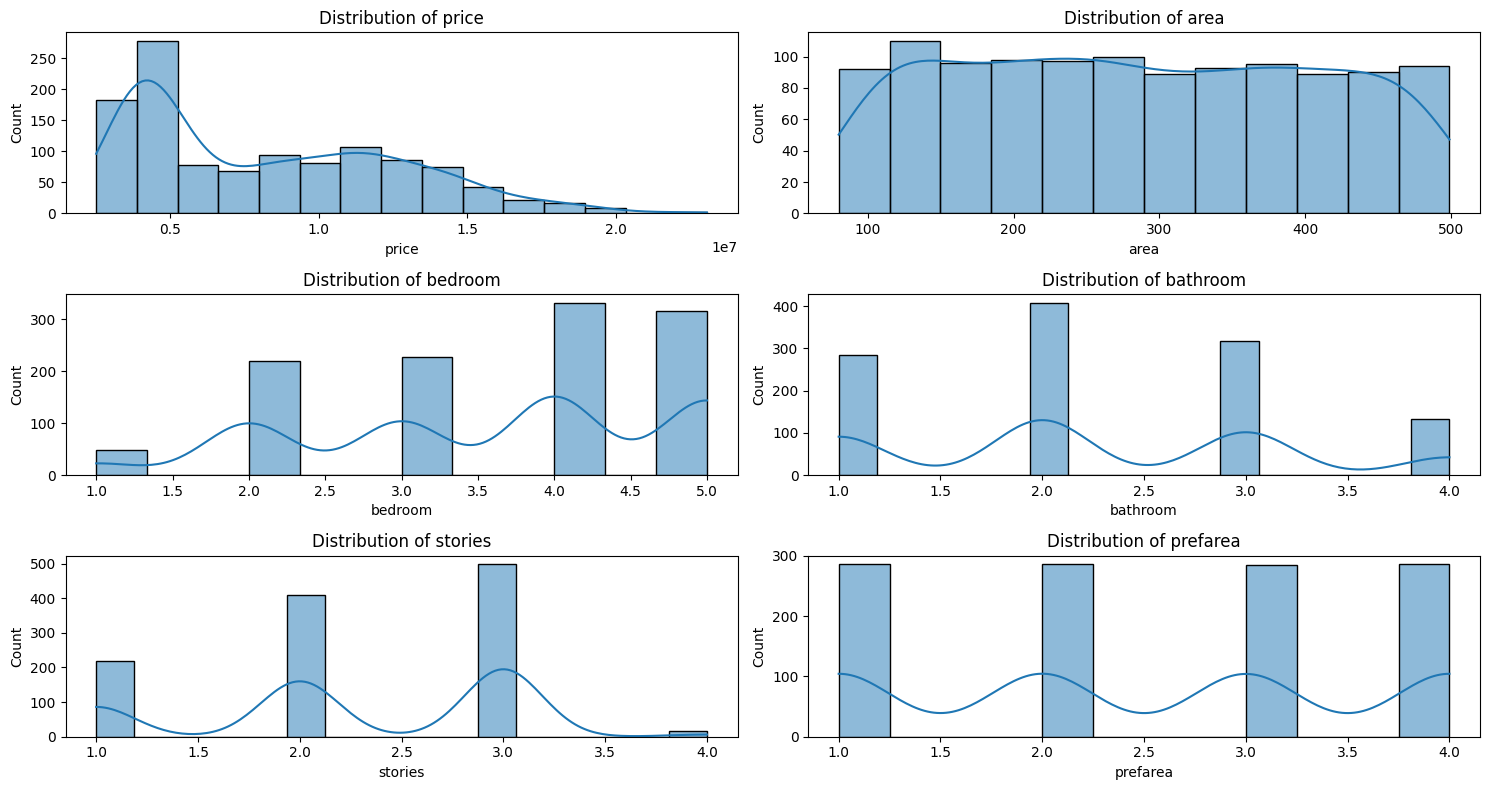

In [112]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(3,2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

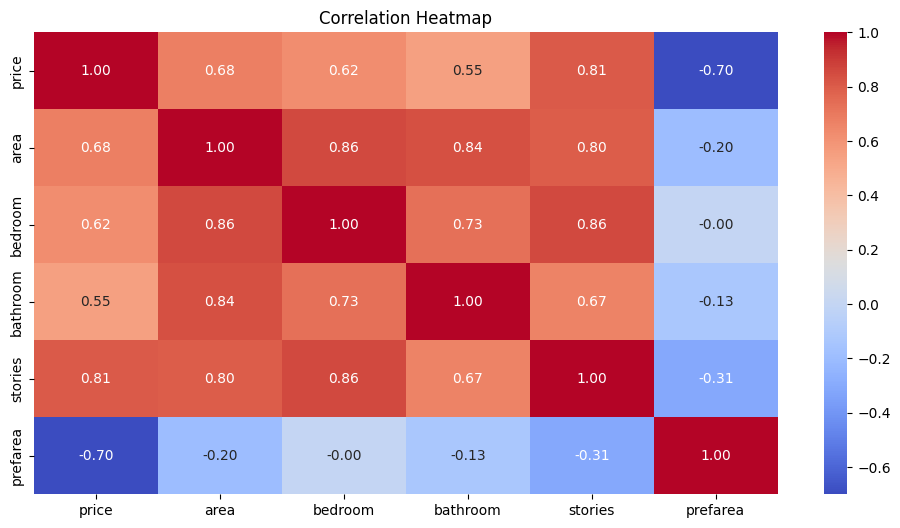

In [113]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

###**Data Transformation**

In [114]:
df.head()

,price,area,bedroom,bathroom,stories,mainroad,guestroom,basement,facing,parking,prefarea,furnishingstatus
0,9495299,427,4,4,3,not connected,yes,yes,west,no,2,not furnished
1,4657356,146,2,1,1,not connected,no,yes,north,no,2,semi-furnished
2,18285022,385,5,3,4,connected,no,yes,north,no,1,furnished
3,3633033,136,2,1,1,not connected,no,no,west,no,3,semi-furnished
4,11320566,343,5,3,3,not connected,no,yes,south,no,2,semi-furnished


In [115]:
df['mainroad'].unique()

array(['not connected', 'connected'], dtype=object)

In [116]:
df['mainroad']=df['mainroad'].replace({'connected':0,'not connected':1})

<ipython-input-116-3c1ff994a0b8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['mainroad']=df['mainroad'].replace({'connected':0,'not connected':1})


Now for MainRoad : 'connected' represents '0'
                   'not connected' represents '1'

In [117]:
df['guestroom'].unique()

array(['yes', 'no'], dtype=object)

In [118]:
df['guestroom']=df['guestroom'].replace({'no':1,'yes':0})

<ipython-input-118-bb95e05f11cd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['guestroom']=df['guestroom'].replace({'no':1,'yes':0})


Now for GuestRoom : 'yes' represents '0'
                    'no' represents '1'

In [119]:
df['basement'].unique()

array(['yes', 'no'], dtype=object)

In [120]:
df['basement']=df['basement'].replace({'no':0,'yes':1})

<ipython-input-120-15a67bbffb03>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['basement']=df['basement'].replace({'no':0,'yes':1})


Now for Basement : 'yes' represents '0'
                    'no' represents '1'

In [121]:
df['facing'].unique()

array(['west', 'north', 'south', 'east'], dtype=object)

In [122]:
df['facing']=df['facing'].replace({'east':1,'west':2,'north':3,'south':4})

<ipython-input-122-7e58e388daec>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['facing']=df['facing'].replace({'east':1,'west':2,'north':3,'south':4})


Now for Facing : 'east' represents '0'
                 'west' represents '1'
                 'north' represents '2'
                 'south' represents '3'

In [123]:
df['parking'].unique()

array(['no', 'yes'], dtype=object)

In [124]:
df['parking']=df['parking'].replace({'no':1,'yes':0})

<ipython-input-124-56b3968f0a97>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['parking']=df['parking'].replace({'no':1,'yes':0})


Now for Parking : 'yes' represents '0'
                    'no' represents '1'

In [125]:
df['furnishingstatus'].unique()

array(['not furnished', 'semi-furnished', 'furnished'], dtype=object)

In [126]:
df['furnishingstatus']=df['furnishingstatus'].replace({'furnished':0,'semi-furnished':1,'not furnished':2})

<ipython-input-126-cbe65f0991c7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus']=df['furnishingstatus'].replace({'furnished':0,'semi-furnished':1,'not furnished':2})


Now for Furnishing Status: 'furnished' represents '0'
                    'semi furnished' represents '1'
                    'unfurnished' represents '2'

In [127]:
df.head()

,price,area,bedroom,bathroom,stories,mainroad,guestroom,basement,facing,parking,prefarea,furnishingstatus
0,9495299,427,4,4,3,1,0,1,2,1,2,2
1,4657356,146,2,1,1,1,1,1,3,1,2,1
2,18285022,385,5,3,4,0,1,1,3,1,1,0
3,3633033,136,2,1,1,1,1,0,2,1,3,1
4,11320566,343,5,3,3,1,1,1,4,1,2,1


### **Seprate Features and Target**

In [128]:
X = df.drop(['price'], axis=1)
y = df['price']

 Split the dataset into training and testing sets

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Training the Model

Linear Regression

In [130]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

Random Forest

In [131]:
rf_model = RandomForestRegressor(n_estimators=80, max_depth=10,min_samples_split=2,min_samples_leaf=4,random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

K fold

In [132]:
kf = KFold(n_splits=8, shuffle=True, random_state=42)

###Accuracy and Scores

Linear Regression

In [133]:
lr_r2 = r2_score(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)

print("\nLinear Regression Results:")
print(f"R² Score      : {lr_r2:.4f}")
print(f"MSE           : {lr_mse:.4f}")
print(f"RMSE          : {lr_rmse:.4f}")
print(f"Accuracy (R²) : {lr_r2 * 100:.2f}%")


Linear Regression Results:
R² Score      : 0.8805
MSE           : 2091360739039.3025
RMSE          : 1446153.7743
Accuracy (R²) : 88.05%


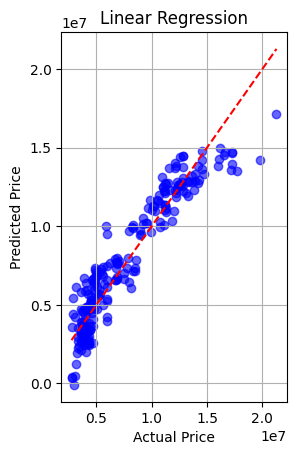

In [134]:
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_preds, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression")
plt.grid(True)


Random Forest

In [135]:
rf_r2 = r2_score(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)

print("\nRandom Forest Results:")
print(f"R² Score      : {rf_r2:.4f}")
print(f"MSE           : {rf_mse:.4f}")
print(f"RMSE          : {rf_rmse:.4f}")
print(f"Accuracy (R²) : {rf_r2 * 100:.2f}%")


Random Forest Results:
R² Score      : 0.9383
MSE           : 1079616249183.3264
RMSE          : 1039045.8359
Accuracy (R²) : 93.83%


In [136]:
rf_train_preds = rf_model.predict(X_train)
rf_train_r2 = r2_score(y_train, rf_train_preds)
rf_train_mse = mean_squared_error(y_train, rf_train_preds)
rf_train_rmse = np.sqrt(rf_train_mse)

rf_test_preds = rf_model.predict(X_test)
rf_test_r2 = r2_score(y_test, rf_test_preds)
rf_test_mse = mean_squared_error(y_test, rf_test_preds)
rf_test_rmse = np.sqrt(rf_test_mse)
print("\nRandom Forest Results:")

print("\n[Train Performance]")
print(f"R² Score      : {rf_train_r2:.4f}")
print(f"MSE           : {rf_train_mse:.4f}")
print(f"RMSE          : {rf_train_rmse:.4f}")
print(f"Accuracy (R²) : {rf_train_r2 * 100:.2f}%")

print("\n[Test Performance]")
print(f"R² Score      : {rf_test_r2:.4f}")
print(f"MSE           : {rf_test_mse:.4f}")
print(f"RMSE          : {rf_test_rmse:.4f}")
print(f"Accuracy (R²) : {rf_test_r2 * 100:.2f}%")


Random Forest Results:

[Train Performance]
R² Score      : 0.9719
MSE           : 554491002905.4346
RMSE          : 744641.5264
Accuracy (R²) : 97.19%

[Test Performance]
R² Score      : 0.9383
MSE           : 1079616249183.3264
RMSE          : 1039045.8359
Accuracy (R²) : 93.83%


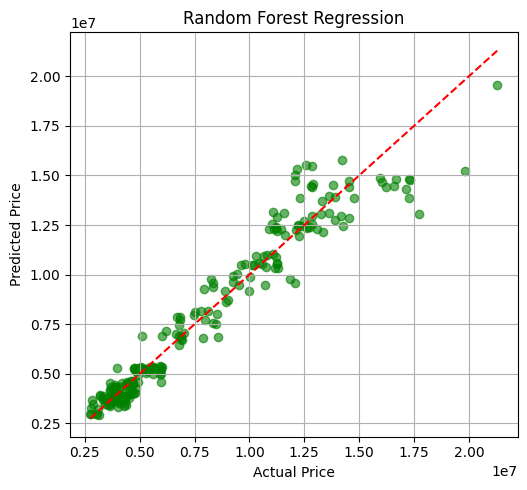

In [137]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_preds, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest Regression")
plt.grid(True)
plt.tight_layout()
plt.show();

K Fold Cross Validation

In [138]:
r2_scores = []
mse_scores = []

In [139]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))

In [140]:
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.sqrt(mean_mse)

In [141]:
print("\nLinear Regression K-Fold CV Results:")
print(f"Average R² Score : {mean_r2:.4f}")
print(f"Average MSE      : {mean_mse:.4f}")
print(f"Average RMSE     : {mean_rmse:.4f}")
print(f"Accuracy (R²)    : {mean_r2 * 100:.2f}%")


Linear Regression K-Fold CV Results:
Average R² Score : 0.8992
Average MSE      : 1923922627623.7222
Average RMSE     : 1387055.3802
Accuracy (R²)    : 89.92%


XGBoost

In [142]:
model = XGBRegressor(objective='reg:squarederror', booster='gblinear', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [143]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 2868965539840.00
R² Score: 0.8734


Backend-Frontend Integration

In [144]:
import joblib

# after training your RandomForestRegressor model as 'rf_model'
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [145]:
!pip install Flask-Cors
!pip install pyngrok
import threading
import time
import joblib
import numpy as np
from flask import Flask, request, jsonify
from flask_cors import CORS
from pyngrok import ngrok

app = Flask(__name__)
CORS(app)  # Enable CORS

# Load your saved model
model = joblib.load('random_forest_model.pkl')

@app.route("/")
def home():
    return "Flask is running with ngrok in Colab!"

@app.route('/predict', methods=['POST'])
def predict():
    print("🔍 Received a prediction request")
    data = request.get_json(force=True)
    features = data['features']  # expects a list of feature values in correct order
    features_array = np.array(features).reshape(1, -1)

    prediction = model.predict(features_array)
    predicted_price = float(prediction[0])

    return jsonify({'predicted_price': predicted_price})

def run_app():
    app.run(port=5000)

ngrok.set_auth_token("2xdefeH2p83c9OpRYgbM1fU0uiU_5ojMwv1xELMogCefDpRUL")
public_url = ngrok.connect(5000)
print("🔗 Ngrok Tunnel URL:", public_url)

threading.Thread(target=run_app).start()
time.sleep(1)


🔗 Ngrok Tunnel URL: NgrokTunnel: "https://4de4-35-237-252-232.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.
